In [1]:
#Importing the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Reading the overall train dataset
data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/Sameek/0. University of North Texas/UNT Masters Course/Semester 1 - Fall 2024/CSCE 5214 - Software Development for AI/Project 1/spaceship-titanic/train.csv')

#Displaying the first 5 rows of the overall train dataset
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Getting the datatypes of the dataset
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
#Consolidating the 3 columns by Total Expense
data_TotalExpenses = data[['RoomService', 'FoodCourt','ShoppingMall','Spa']]

#Calculate sum of each row and create 'sum' column
data_TotalExpenses['Total Expenses'] = data_TotalExpenses.sum(axis=1)

#Create 'Total Expenses' column in the original DataFrame
data['Total Expenses'] = data_TotalExpenses['Total Expenses']

data_updated = data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'Transported', 'Total Expenses']]

#Splitting the 'Cabin' column
data_updated[['Deck','Num', 'Side']] = data_updated['Cabin'].str.split('/', expand=True)

#Selecting the desired columns for the final data_updated DataFrame
data_updated = data_updated[['PassengerId', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'Total Expenses','Transported']]
data_updated

C:\Users\bhatt\AppData\Local\Temp\ipykernel_8056\683837856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_TotalExpenses['Total Expenses'] = data_TotalExpenses.sum(axis=1)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_8056\683837856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated[['Deck','Num', 'Side']] = data_updated['Cabin'].str.split('/', expand=True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_8056\683837856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,Total Expenses,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,692.0,True
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,10334.0,False
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,4983.0,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,1089.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98,P,55 Cancri e,41.0,True,8462.0,False
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,False
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,1873.0,True
8691,9280_01,Europa,False,E,608,S,55 Cancri e,32.0,False,1402.0,False


In [5]:
#print the number of missing values in each column
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep         217
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP               203
Total Expenses      0
Transported         0
dtype: int64


***Using Mean for Handling missing values for numrical values : Age, Total Expenses***

In [6]:
#Calculate the mean of the 'Age' column
mean_age = data_updated['Age'].mean()

# Fill missing values in 'Age' column with the mean
data_updated['Age'].fillna(mean_age, inplace=True)

# Calculate the mean of the 'Total Expenses' column
mean_total_expenses = data_updated['Total Expenses'].mean()

# Fill missing values in 'Total Expenses' column with the mean
data_updated['Total Expenses'].fillna(mean_total_expenses, inplace=True)

# Print the number of missing values in each column to verify
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep         217
Deck              199
Num               199
Side              199
Destination       182
Age                 0
VIP               203
Total Expenses      0
Transported         0
dtype: int64


In [7]:
from sklearn.impute import KNNImputer

# Create a copy of the DataFrame to avoid modifying the original
data_imputed = data_updated.copy()

# Select relevant columns for KNN imputation (numerical and categorical)
features = ['Age', 'Total Expenses', 'HomePlanet']
data_subset = data_imputed[features]

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_subset, columns=['HomePlanet'])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed_array = imputer.fit_transform(data_encoded)

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed_array, columns=data_encoded.columns)

# Reverse one-hot encoding to get 'HomePlanet' back
data_imputed['HomePlanet'] = data_imputed[['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars']].idxmax(axis=1).str.replace('HomePlanet_', '')

# Drop the one-hot encoded columns
data_imputed = data_imputed.drop(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars'], axis=1)

# Update the original DataFrame with imputed 'HomePlanet' values
data_updated['HomePlanet'] = data_imputed['HomePlanet']

print(data_updated.isnull().sum())

PassengerId         0
HomePlanet          0
CryoSleep         217
Deck              199
Num               199
Side              199
Destination       182
Age                 0
VIP               203
Total Expenses      0
Transported         0
dtype: int64


***Using KNN for handling missing values in categorical data columns***

In [8]:
# Create a copy of the DataFrame to avoid modifying the original
data_imputed = data_updated.copy()

# Select relevant columns for KNN imputation (numerical and categorical)
features = ['Age', 'Total Expenses', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'VIP']
data_subset = data_imputed[features]

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_subset, columns=['CryoSleep', 'Deck', 'Side', 'Destination', 'VIP'], dummy_na=False) #dummy_na=False will ignore nan values during one-hot encoding

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed_array = imputer.fit_transform(data_encoded)

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed_array, columns=data_encoded.columns)

# Reverse one-hot encoding to get categorical features back
categorical_features = ['CryoSleep', 'Deck', 'Side', 'Destination', 'VIP']
for feature in categorical_features:
    #Get a list of columns related to the feature
    feature_cols = [col for col in data_imputed.columns if feature in col]

    #Find the column with the maximum value for each row and extract the category name
    data_imputed[feature] = data_imputed[feature_cols].idxmax(axis=1).str.replace(f'{feature}_', '')

    #Remove the one-hot encoded columns for the current feature
    data_imputed = data_imputed.drop(feature_cols, axis=1)

# Update the original DataFrame with imputed values
for feature in features:
    data_updated[feature] = data_imputed[feature]

print(data_updated.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Deck              0
Num               0
Side              0
Destination       0
Age               0
VIP               0
Total Expenses    0
Transported       0
dtype: int64


In [9]:
print(data_updated)

     PassengerId HomePlanet CryoSleep Deck     Num Side    Destination   Age  \
0        0001_01     Europa     False    B     0.0    P    TRAPPIST-1e  39.0   
1        0002_01      Earth     False    F     0.0    S    TRAPPIST-1e  24.0   
2        0003_01     Europa     False    A     0.0    S    TRAPPIST-1e  58.0   
3        0003_02     Europa     False    A     0.0    S    TRAPPIST-1e  33.0   
4        0004_01      Earth     False    F     1.0    S    TRAPPIST-1e  16.0   
...          ...        ...       ...  ...     ...  ...            ...   ...   
8688     9276_01     Europa     False    A    98.0    P    55 Cancri e  41.0   
8689     9278_01      Earth      True    G  1499.0    S  PSO J318.5-22  18.0   
8690     9279_01      Earth     False    G  1500.0    S    TRAPPIST-1e  26.0   
8691     9280_01     Europa     False    E   608.0    S    55 Cancri e  32.0   
8692     9280_02     Europa     False    E   608.0    S    TRAPPIST-1e  44.0   

        VIP  Total Expenses  Transporte

#### Using target encoder to handle categorical values

In [10]:
# Target Encoding: This enconding is used when the relationship between 
#categories and the target variable is considerable and cannot be ignored.
import category_encoders as ce

# Used target encoding on the columns HomePlanet, Destination, Deck, CryoSleep, Side
target_encoder = ce.TargetEncoder(cols=['HomePlanet', 'Destination', 'Deck', 'CryoSleep', 'Side'])

In [11]:
# Transforming the encoded columns as per the target column
data_encoded = target_encoder.fit_transform(data_updated[['HomePlanet', 'Destination', 'Deck', 'CryoSleep', 'Side']], data_updated['Transported'])

In [12]:
print(data_encoded)

      HomePlanet  Destination      Deck  CryoSleep      Side
0       0.658846     0.471175  0.734275   0.335042  0.453575
1       0.427649     0.471175  0.439871   0.335042  0.555037
2       0.658846     0.471175  0.498901   0.335042  0.555037
3       0.658846     0.471175  0.498901   0.335042  0.555037
4       0.427649     0.471175  0.439871   0.335042  0.555037
...          ...          ...       ...        ...       ...
8688    0.658846     0.600404  0.498901   0.335042  0.453575
8689    0.427649     0.503769  0.516217   0.817583  0.555037
8690    0.427649     0.471175  0.516217   0.335042  0.555037
8691    0.658846     0.600404  0.357306   0.335042  0.555037
8692    0.658846     0.471175  0.357306   0.335042  0.555037

[8693 rows x 5 columns]


In [13]:
# Replacing the encoded values of the respective columns in the original dataset
data_updated['HomePlanet'] = data_encoded['HomePlanet']
data_updated['Destination'] = data_encoded['Destination']
data_updated['Deck'] = data_encoded['Deck']
data_updated['CryoSleep'] = data_encoded['CryoSleep']
data_updated['Side'] = data_encoded['Side']

In [14]:
print(data_updated)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.658846   0.335042  0.734275     0.0  0.453575   
1        0002_01    0.427649   0.335042  0.439871     0.0  0.555037   
2        0003_01    0.658846   0.335042  0.498901     0.0  0.555037   
3        0003_02    0.658846   0.335042  0.498901     0.0  0.555037   
4        0004_01    0.427649   0.335042  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.658846   0.335042  0.498901    98.0  0.453575   
8689     9278_01    0.427649   0.817583  0.516217  1499.0  0.555037   
8690     9279_01    0.427649   0.335042  0.516217  1500.0  0.555037   
8691     9280_01    0.658846   0.335042  0.357306   608.0  0.555037   
8692     9280_02    0.658846   0.335042  0.357306   608.0  0.555037   

      Destination   Age    VIP  Total Expenses  Transported  
0        0.471175  39.0  False             0.0        False  
1        0.471175  24.0

In [15]:
print(data_updated['VIP'].dtype)

object


In [16]:
# For the column VIP, replaced the False value with 0 and True value with 1
data_updated['VIP'] = data_updated['VIP'].replace({'True': 1, 'False': 0})
print(data_updated)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.658846   0.335042  0.734275     0.0  0.453575   
1        0002_01    0.427649   0.335042  0.439871     0.0  0.555037   
2        0003_01    0.658846   0.335042  0.498901     0.0  0.555037   
3        0003_02    0.658846   0.335042  0.498901     0.0  0.555037   
4        0004_01    0.427649   0.335042  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.658846   0.335042  0.498901    98.0  0.453575   
8689     9278_01    0.427649   0.817583  0.516217  1499.0  0.555037   
8690     9279_01    0.427649   0.335042  0.516217  1500.0  0.555037   
8691     9280_01    0.658846   0.335042  0.357306   608.0  0.555037   
8692     9280_02    0.658846   0.335042  0.357306   608.0  0.555037   

      Destination   Age  VIP  Total Expenses  Transported  
0        0.471175  39.0    0             0.0        False  
1        0.471175  24.0    

In [17]:
# Splitting and storing the taget column and the sample columns
X = data_updated[['PassengerId','HomePlanet','CryoSleep','Deck','Num','Side','Destination','Age','VIP','Total Expenses']]
y = data_updated[['Transported']]

In [18]:
print(X)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.658846   0.335042  0.734275     0.0  0.453575   
1        0002_01    0.427649   0.335042  0.439871     0.0  0.555037   
2        0003_01    0.658846   0.335042  0.498901     0.0  0.555037   
3        0003_02    0.658846   0.335042  0.498901     0.0  0.555037   
4        0004_01    0.427649   0.335042  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.658846   0.335042  0.498901    98.0  0.453575   
8689     9278_01    0.427649   0.817583  0.516217  1499.0  0.555037   
8690     9279_01    0.427649   0.335042  0.516217  1500.0  0.555037   
8691     9280_01    0.658846   0.335042  0.357306   608.0  0.555037   
8692     9280_02    0.658846   0.335042  0.357306   608.0  0.555037   

      Destination   Age  VIP  Total Expenses  
0        0.471175  39.0    0             0.0  
1        0.471175  24.0    0           692.0  
2     

In [19]:
print(y)

      Transported
0           False
1            True
2           False
3           False
4            True
...           ...
8688        False
8689        False
8690         True
8691        False
8692         True

[8693 rows x 1 columns]


In [26]:
# Splitting the training and validation set in 80:20 ratio
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
print(X_train)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
2990     3236_02    0.427649   0.335042  0.439871   676.0  0.453575   
3300     3546_01    0.427649   0.335042  0.439871   672.0  0.555037   
686      0714_03    0.427649   0.335042  0.516217   109.0  0.453575   
6405     6764_02    0.523024   0.335042  0.439871  1294.0  0.555037   
7882     8411_01    0.427649   0.335042  0.439871  1726.0  0.453575   
...          ...         ...        ...       ...     ...       ...   
1966     2099_01    0.523024   0.335042  0.433054    71.0  0.555037   
84       0091_02    0.427649   0.335042  0.439871    20.0  0.555037   
748      0787_01    0.427649   0.817583  0.516217   114.0  0.453575   
3477     3742_01    0.427649   0.817583  0.516217   607.0  0.453575   
1161     1228_02    0.523024   0.335042  0.357306    89.0  0.555037   

      Destination   Age  VIP  Total Expenses  
2990     0.471175  31.0    0          1371.0  
3300     0.471175  36.0    0            10.0  
686   

In [28]:
print(y_train)

      Transported
2990        False
3300        False
686          True
6405         True
7882         True
...           ...
1966         True
84          False
748         False
3477        False
1161         True

[6954 rows x 1 columns]


In [29]:
print(X_test)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
1190     1263_01    0.523024   0.335042  0.439871   244.0  0.555037   
7980     8537_02    0.523024   0.335042  0.439871  1643.0  0.555037   
2514     2701_01    0.427649   0.817583  0.516217   428.0  0.555037   
3791     4044_03    0.523024   0.817583  0.439871   765.0  0.555037   
22       0020_02    0.427649   0.817583  0.357306     0.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
1830     1959_02    0.658846   0.335042  0.680054    66.0  0.453575   
5519     5885_07    0.427649   0.335042  0.516217   954.0  0.555037   
6598     6967_01    0.658846   0.335042  0.680054   256.0  0.555037   
8492     9073_01    0.658846   0.335042  0.498901   107.0  0.555037   
6976     7410_01    0.427649   0.335042  0.516217  1201.0  0.555037   

      Destination   Age  VIP  Total Expenses  
1190     0.471175  25.0    0          1151.0  
7980     0.471175  39.0    0          5617.0  
2514  

In [30]:
print(y_test)

      Transported
1190        False
7980        False
2514         True
3791         True
22          False
...           ...
1830        False
5519        False
6598        False
8492        False
6976         True

[1739 rows x 1 columns]


In [31]:
# Initializing the Logisitc Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [34]:
print(f'Accuracy : {accuracy:.4f}')
print('Confusion Matrix :')
print(conf_matrix)
print('Classification Report :')
print(class_report)

Accuracy : 0.6182
Confusion Matrix :
[[554 309]
 [355 521]]
Classification Report :
              precision    recall  f1-score   support

       False       0.61      0.64      0.63       863
        True       0.63      0.59      0.61       876

    accuracy                           0.62      1739
   macro avg       0.62      0.62      0.62      1739
weighted avg       0.62      0.62      0.62      1739



#### Using F1 score and AUC-ROC for model performance measure

In [40]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [37]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.6108


In [38]:
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {roc_auc:.4f}')

AUC-ROC: 0.6668


In [41]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

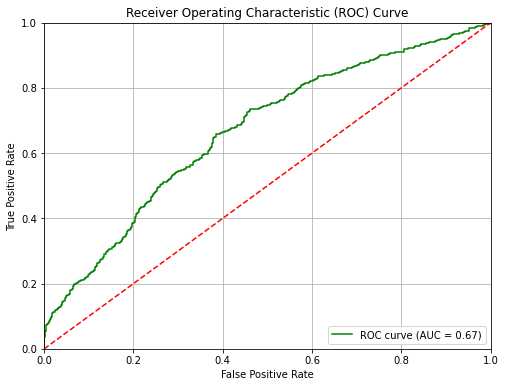

In [43]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()